In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (128,128)
classifier = tf.keras.Sequential([hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2", input_shape = IMAGE_SHAPE+(3,))])

In [7]:
IMAGE_SHAPE+(3,)

(128, 128, 3)

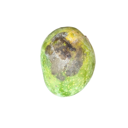

In [8]:
mango = Image.open('mango.jpg').resize(IMAGE_SHAPE)
mango

In [9]:
mango = np.array(mango)/255.0
mango.shape

(128, 128, 3)

In [10]:
mango[np.newaxis, ...].shape

(1, 128, 128, 3)

In [11]:
result = classifier.predict(mango[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 600ms/step


(1, 1001)

In [12]:
predicted_label_index = np.index = np.argmax(result)
predicted_label_index

957

In [21]:
local_dataset_path = "D:\IIT\Data Science Group Project\Model"

# Check if the path exists
if not os.path.exists(local_dataset_path):
    print(f"The specified path '{local_dataset_path}' does not exist.")
else:
    # Use the local path directly
    data_dir = local_dataset_path
    print(f"Dataset loaded from local path: {data_dir}")
    # Now you can use 'data_dir' for further processing (e.g., loading images, etc.)

Dataset loaded from local path: D:\IIT\Data Science Group Project\Model


In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('D:/IIT/Data Science Group Project/Model/Dataset/GUTI_01_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Dataset/GUTI_01_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Dataset/GUTI_02_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Dataset/GUTI_02_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Dataset/GUTI_03_A.jpg')]

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

972


In [33]:
overripe = list(data_dir.glob('OverRipe/*'))
overripe[:5]

[WindowsPath('D:/IIT/Data Science Group Project/Model/OverRipe/GUTI_138_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/OverRipe/GUTI_138_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/OverRipe/GUTI_164_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/OverRipe/GUTI_164_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/OverRipe/GUTI_169_A.jpg')]

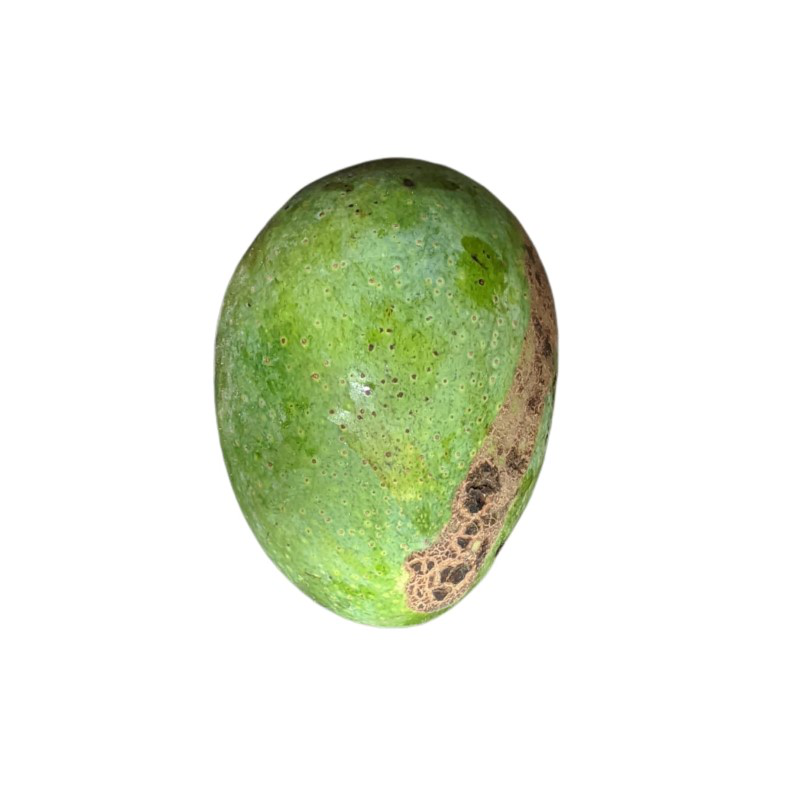

In [34]:
Image.open(str(overripe[2]))

In [35]:
ripe = list(data_dir.glob('Ripe/*'))
ripe[:5]

[WindowsPath('D:/IIT/Data Science Group Project/Model/Ripe/GUTI_140_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Ripe/GUTI_189_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Ripe/GUTI_189_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Ripe/GUTI_194_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/Ripe/GUTI_194_B.jpg')]

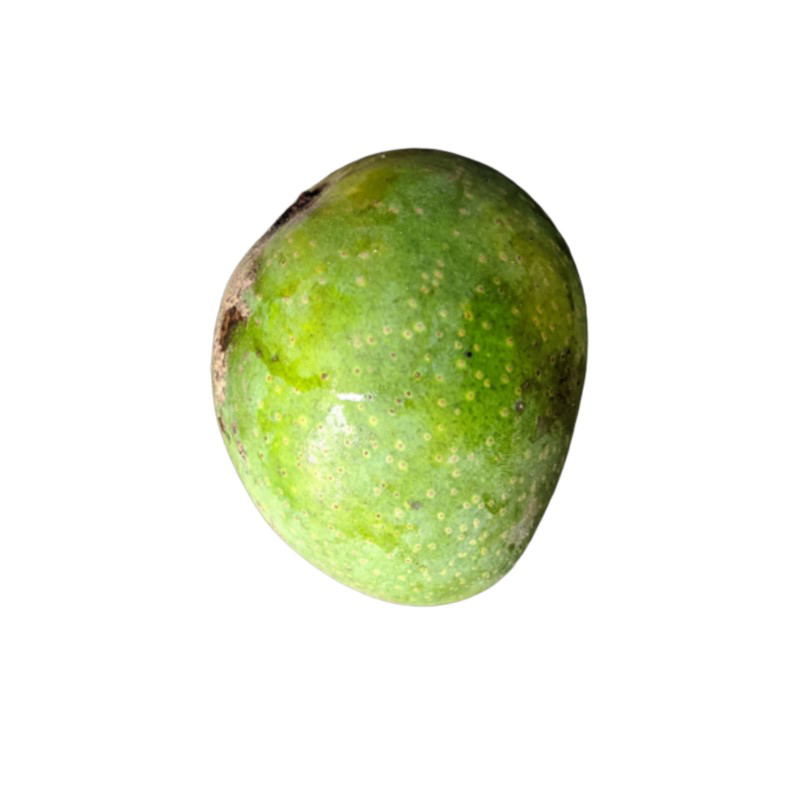

In [36]:
Image.open(str(ripe[2]))

In [37]:
mango_images_dict = {
    'overripe': list(data_dir.glob('overripe/*')),
    'ripe': list(data_dir.glob('ripe/*')),
    'unripe': list(data_dir.glob('unripe/*')),
}                                

In [38]:
mango_images_dict['overripe']

[WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_138_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_138_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_164_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_164_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_169_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_169_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_94_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/GUTI_94_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/KHIR_123_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/KHIR_123_B.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/KHIR_30_A.jpg'),
 WindowsPath('D:/IIT/Data Science Group Project/Model/overripe/KHIR_30_B.jpg'),
 WindowsPath('D:/IIT/Data Scienc

In [39]:
mango_label_dict = {
    'overripe': 0,
    'ripe': 1,
    'unripe': 2,
}

In [40]:
str(mango_images_dict['overripe'][0])

'D:\\IIT\\Data Science Group Project\\Model\\overripe\\GUTI_138_A.jpg'

In [41]:
img = cv2.imread(str(mango_images_dict['overripe'][0]))
img.shape

(800, 800, 3)

In [42]:
cv2.resize(img,IMAGE_SHAPE).shape

(128, 128, 3)

In [45]:
x,y = [], []

for ripnes_level, images in mango_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        x.append(resized_img)
        y.append(mango_label_dict[ripnes_level])

In [48]:
x = np.array(x)
y = np.array(y)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [50]:
x_train_scaled = x_train / 255
x_test_scaled = y_train/ 255

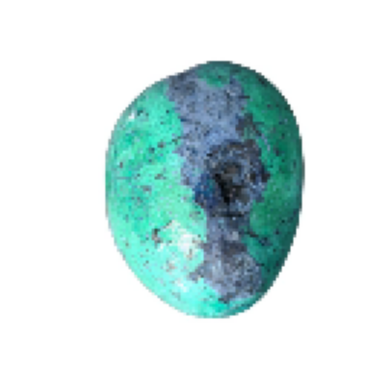

In [53]:
plt.axis('off')
plt.imshow(x[0])

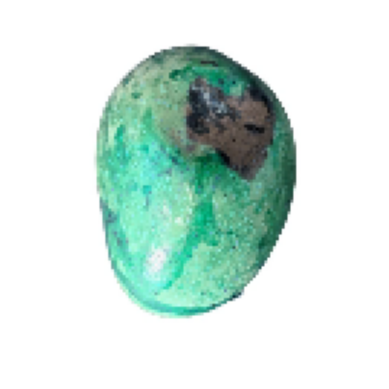

In [54]:
plt.axis('off')
plt.imshow(x[1])

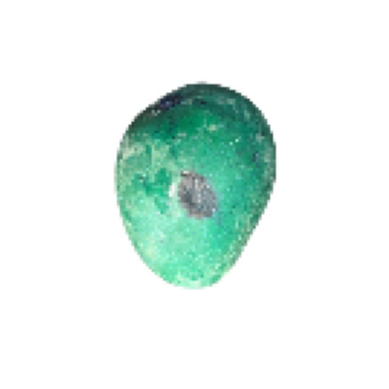

In [55]:
plt.axis('off')
plt.imshow(x[3])

In [57]:
predicted = classifier.predict(np.array([x[0], x[1], x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 28ms/step


array([689, 905, 689], dtype=int64)

In [61]:
feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/feature_vector/versions/2"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (128,128,3), trainable = False)

HTTPError: HTTP Error 404: Not Found